In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [2]:
# sunspot cycle time series 
#download and save the data 
import requests
import pandas as pd
data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/Sunspots-monthly.csv'
r = requests.get(data_url)
open('Sunspots-monthly.csv', 'wb').write(r.content)

ts_sunspot = pd.read_csv('Sunspots-monthly.csv',header=None,delimiter=';')

In [3]:
# logistic map time series 
def Logistic_Map(x,r):
  return r*x*(1.0-x)


r=4.0;y=0.1;ts_ch=[]
for i in range(0,2000):
  y=Logistic_Map(y,r)
  ts_ch.append(y)

ts_ch_log=np.array(ts_ch[1700:])

In [4]:
#white noise time series 
w_noise = np.random.normal(0,1.0, size=2000)

In [5]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.computation import RPComputation

In [6]:
#Gives you recurrence rate for Logistic Map-
time_series = TimeSeries(ts_ch_log,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(0.08),            #Play around with this number to get recurrence rate of 5%
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)                        #Gets rid of oversampling of data
computation = RQAComputation.create(settings,verbose=False)
logistic_rqa = computation.run();
print(logistic_rqa.recurrence_rate)

0.04950227467231206


In [7]:
#Gives you the RP Matrix for Logistic Map-
computation = RPComputation.create(settings)
result = computation.run()
rmat_logistic=result.recurrence_matrix

In [8]:
time_series = TimeSeries(w_noise,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(0.45),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,verbose=False)
noise_rqa = computation.run();
print(noise_rqa.recurrence_rate)

0.048467887306726146


In [9]:
computation = RPComputation.create(settings)
result = computation.run()
rmat_noise=result.recurrence_matrix

In [10]:
time_series = TimeSeries(ts_sunspot[3],
                         embedding_dimension=10,
                         time_delay=36)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(154.0),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,verbose=False)
sunspot_rqa = computation.run();
print(sunspot_rqa.recurrence_rate)

0.05020062619259546


In [11]:
computation = RPComputation.create(settings)
result = computation.run()
rmat_sunspot=result.recurrence_matrix

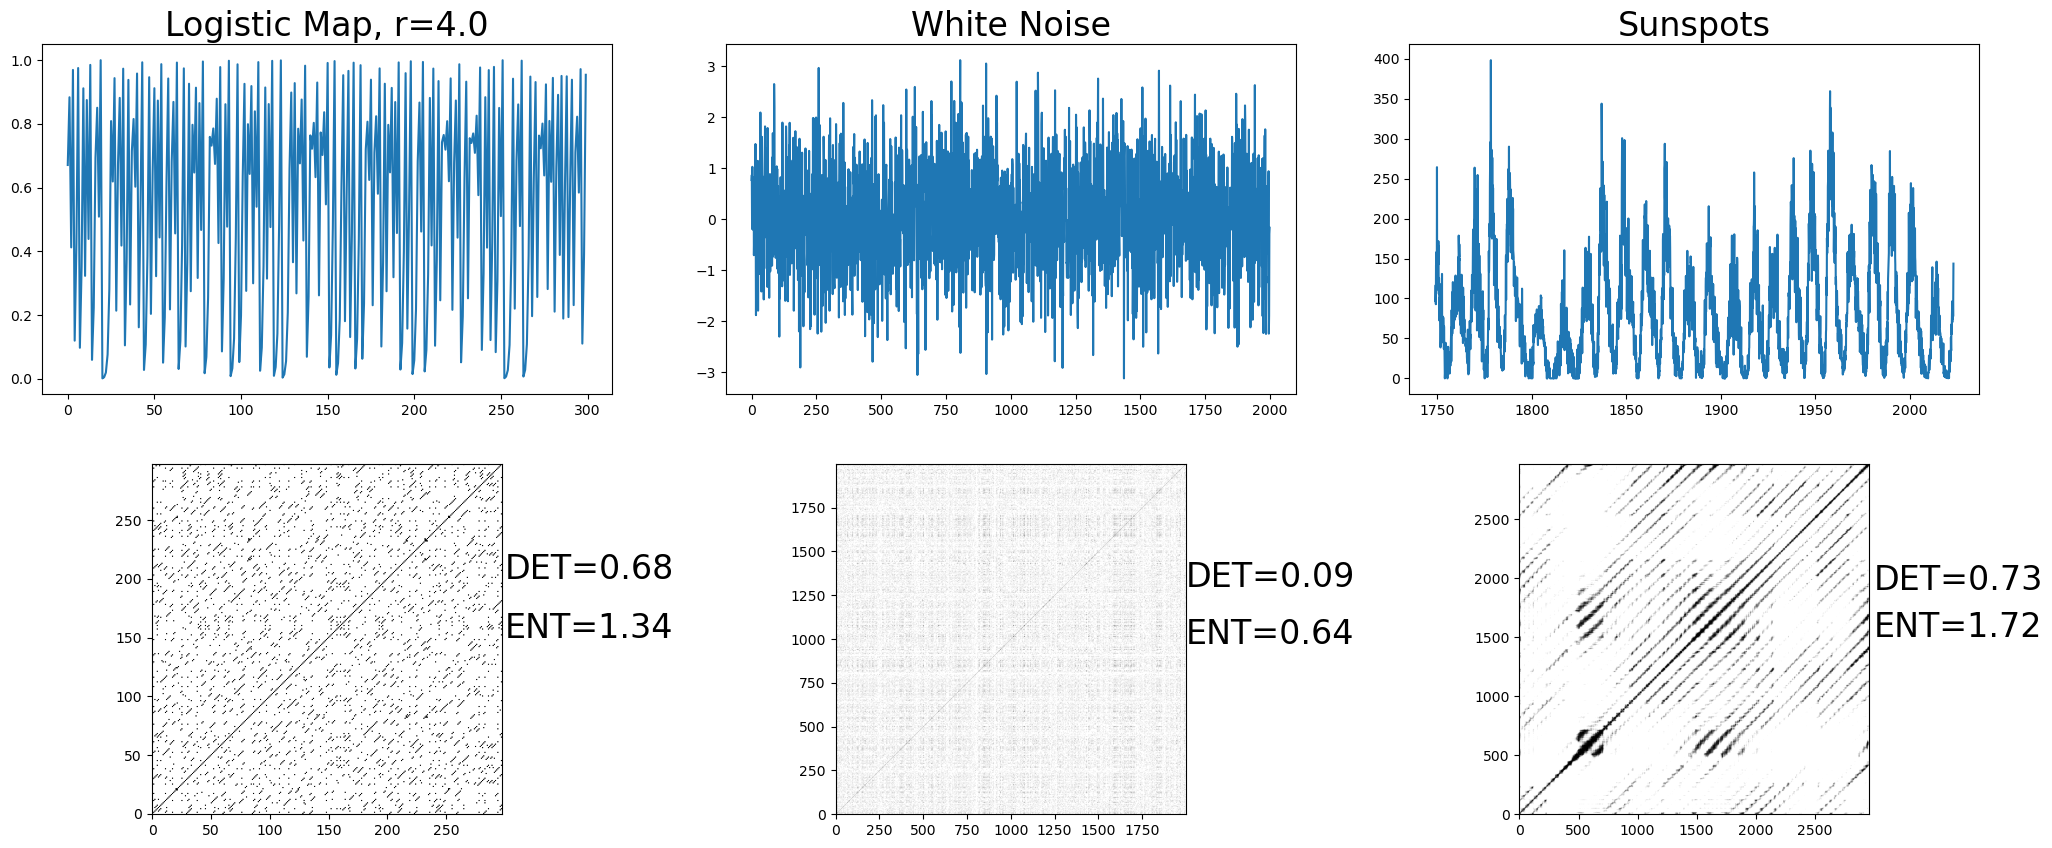

In [12]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
plt.plot(ts_ch_log);
plt.title('Logistic Map, r=4.0',fontsize=24)

plt.subplot(2,3,2)
plt.plot(w_noise)
plt.title('White Noise',fontsize=24)





plt.subplot(2,3,3)
plt.plot(ts_sunspot[2],ts_sunspot[3])
plt.title('Sunspots',fontsize=24)



plt.subplot(2,3,4)
plt.imshow(rmat_logistic,cmap='binary',origin="lower")


logistic_rqa.min_diagonal_line_length = 2
plt.text(300,200,"DET=%2.2f" %(logistic_rqa.determinism),fontsize=24);
plt.text(300,150,"ENT=%2.2f" %(logistic_rqa.entropy_diagonal_lines),fontsize=24);



plt.subplot(2,3,5)
plt.imshow(rmat_noise,cmap='binary',origin="lower")

noise_rqa.min_diagonal_line_length = 2
plt.text(2000,1300,"DET=%2.2f" %(noise_rqa.determinism),fontsize=24);
plt.text(2000,970,"ENT=%2.2f" %(noise_rqa.entropy_diagonal_lines),fontsize=24);



plt.subplot(2,3,6)
plt.imshow(rmat_sunspot,cmap='binary',origin="lower")
sunspot_rqa.min_diagonal_line_length = 2

plt.text(3000,1900,"DET=%2.2f" %(sunspot_rqa.determinism),fontsize=24);
plt.text(3000,1500,"ENT=%2.2f" %(sunspot_rqa.entropy_diagonal_lines),fontsize=24);

#ax1.text(-2,-25,r'$D_2$ =  %3.3f' % (coeffs[0]),fontsize=30);